Pandas is an open source library tailored for data manipulation, data analysis, and data visualization. Written for Python, provides high-performance, robust methods and flexible data structures.  It's geared to be the cornerstone for doing practical and down-to-earth data analysis in Python. More focused in data and less in programming makes pandas the ideal tool for  scientific computing in Python.

In this series, we'll be processing, cleaning, slicing and modeling data, exploring the basics of the Pandas module, show concepts such as Series and DataFrames. We'll read two csv files (the first a list of titanic's passengers, and the second a GDP table), exploring the data and organizing the results of the analysis into a form suitable for plotting. 

Before we begin, you'll not be using only Pandas, but you will also need libraries such as matplotlib and numpy.

<hr style="border-width: 5px;">

####Throughout this chapter, we'll be using:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

####pandas provides a set of data structures which include Series and DataFrames. A few examples of Series.

In [3]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'])
s

0    a
1    b
2    c
3    d
4    e
dtype: object

In [6]:
a = np.array(['a', 'b', 'c', 'd', 'e'])
pd.Series(a)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [5]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)
s

a    1.753725
b    0.263481
c    0.252686
d   -1.586462
e    1.627529
dtype: float64

####pandas allows access to its elements using labels:

In [8]:
s[["a","b"]]

a    1.753725
b    0.263481
dtype: float64

In [7]:
s["b"]

0.2634808465817946

####and slicing

In [9]:
s[:3]

a    1.753725
b    0.263481
c    0.252686
dtype: float64

#### Series can be initialized directly from dictionaries

In [11]:
s = pd.Series({'a': 1, 'b': 2, 'c': 3})
s

a    1
b    2
c    3
dtype: int64

#### DataFrame

In [13]:
df = pd.DataFrame({'a': np.array([1,4,7]),
                'b': np.array([2,5,8]),
                'c': np.array([3,6,9])})
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [24]:
df = pd.DataFrame({'Stocks': ["AAPL","CA","CTXS","FIS","MA"],
                'Values': [126.17,31.85,65.38,64.08,88.72]})
df

,Stocks,Values
0,AAPL,126.17
1,CA,31.85
2,CTXS,65.38
3,FIS,64.08
4,MA,88.72


####You can also access all of the values in a column meeting a certain criteria.

In [25]:
df[df["Values"]>65]

,Stocks,Values
0,AAPL,126.17
2,CTXS,65.38
4,MA,88.72


#### We can add new values:

In [26]:
df = df.append({"Stocks":"GOOG", "Values":523.53}, ignore_index=True)
df

,Stocks,Values
0,AAPL,126.17
1,CA,31.85
2,CTXS,65.38
3,FIS,64.08
4,MA,88.72
5,GOOG,523.53


#### If we wish to access columns, we can use two methods:

In [27]:
Stocks = df["Stocks"]
Stocks

0    AAPL
1      CA
2    CTXS
3     FIS
4      MA
5    GOOG
Name: Stocks, dtype: object

In [29]:
df.Stocks

0    AAPL
1      CA
2    CTXS
3     FIS
4      MA
5    GOOG
Name: Stocks, dtype: object

#### We can easily import the data that we wish to analyze reading from a CSV file. From there, we can manipulate the data by columns, create new columns, and even base the new columns on other column data. In the following example we'll be using data filtered from sample passenger manifest of the Titanic.   https://github.com/richierichrawr/DataSet_Survivors

In [101]:
path = "data/titanic_data.csv"

df = pd.read_csv(path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [104]:
Class1_passengers = len(df[df.Pclass == 1])
Class1_passengers

216

In [106]:
Class3_passengers = len(df[df.Pclass == 3])
Class3_passengers

491

In [37]:
survived = df[df.Survived == 1]
survived_ages = survived["Age"]
not_survived = df[df.Survived == 0]
not_survived_ages = not_survived["Age"]

#### We can drop NaN values

In [38]:
survived_ages = survived_ages.dropna()
not_survived_ages = not_survived_ages.dropna()

#### and obtain the average age

In [48]:
not_survived_ages.sum()/float(len(not_survived_ages))

30.626179245283019

In [49]:
survived_ages.sum()/float(len(survived_ages))


28.343689655172415

#### Survivors by class

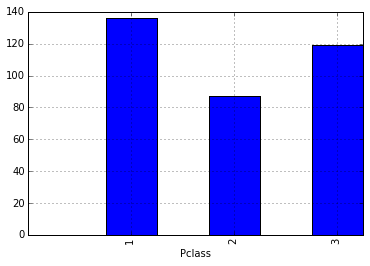

In [58]:
survived.groupby("Pclass")["Survived"].sum().plot(kind="bar")

#### First class survivors with age > 40

In [73]:
titanic = df[["Survived", "Pclass", "Sex", "Age"]]
titanic[titanic.Pclass == 1][titanic.Sex == "male"][titanic.Survived == 1][titanic.Age >40]

,Survived,Pclass,Sex,Age
187,1,1,male,45
449,1,1,male,52
453,1,1,male,49
460,1,1,male,48
587,1,1,male,60
599,1,1,male,49
621,1,1,male,42
630,1,1,male,80
645,1,1,male,48
647,1,1,male,56


#### Third class survivors with age > 40

In [74]:
titanic[titanic.Pclass == 3][titanic.Sex == "male"][titanic.Survived == 1][titanic.Age >40]

,Survived,Pclass,Sex,Age
338,1,3,male,45
414,1,3,male,44


#### GDP table

In [84]:
path = "data/gdp.csv"

gdp = pd.read_csv(path)
gdp

,Country code,Country name,2013,2012,2011,2010,2009,2008,2007,2006,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,ABW,ARUBA,NaN,NaN,36016.483757,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,AFGHANISTAN,1946.193806,1927.138767,1695.153436,1604.191457,1497.884256,1258.739944,1222.764099,1076.461378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,ANGOLA,7736.174682,7360.598595,7094.084302,6904.562607,6813.103048,6821.202994,6079.390171,4996.766535,...,2220.008106,2185.987078,2049.995372,1893.418283,1852.653900,NaN,NaN,NaN,NaN,NaN
3,ALB,ALBANIA,10374.015637,10007.648594,9897.179958,9480.886205,9485.112883,8873.757846,7735.057391,7240.417503,...,2907.447872,2603.009290,2618.290977,2636.355222,2507.940163,2452.070866,2451.231704,2386.304685,2235.225563,1978.272001
4,ARE,UNITED ARAB EMIRATES,NaN,59845.256817,56376.769923,55764.873251,59291.103838,70133.152975,78193.619487,87766.147264,...,45794.509345,41676.568915,43933.739790,43829.675785,53393.942593,56685.289105,55199.496976,58620.029648,62769.494553,58933.465467
5,ARG,ARGENTINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12033.897511,...,5395.332092,5702.002059,5737.671889,5497.294044,5059.420927,5393.207642,5163.453287,4855.308602,4889.201863,4812.392778
6,ARM,ARMENIA,7776.286043,7421.823295,6812.351956,6376.326219,6153.829672,7089.767500,6479.643805,5524.415411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ATG,ANTIGUA AND BARBUDA,21027.826640,20947.549920,19987.924139,20151.493171,21670.577230,24715.443684,24503.718287,22039.727933,...,9932.811390,8967.387329,8097.460722,7140.433283,6088.805332,5379.635927,4648.013151,4209.873481,3916.041597,3413.026195
8,AUS,AUSTRALIA,43543.812040,42872.045711,41705.997447,39048.153435,40208.926886,37494.600650,36577.679269,34272.760220,...,16085.768617,14959.866905,14050.318537,13545.314561,12928.563239,12158.972884,11139.699412,10941.108957,10177.674631,9185.606082
9,AUT,AUSTRIA,45492.823639,44692.218886,44239.864321,41677.506456,40679.196946,41075.438034,39178.013294,37667.505914,...,17937.345603,16711.284262,15659.847331,15019.551743,14369.699575,13610.330015,13110.122115,12227.384880,11306.055771,10378.586352


In [90]:
gdp_data = gdp[["2013","Country name"]].dropna()
gdp_data

,2013,Country name
1,1946.193806,AFGHANISTAN
2,7736.174682,ANGOLA
3,10374.015637,ALBANIA
6,7776.286043,ARMENIA
7,21027.826640,ANTIGUA AND BARBUDA
8,43543.812040,AUSTRALIA
9,45492.823639,AUSTRIA
10,17143.479231,AZERBAIJAN
11,771.715430,BURUNDI
12,41663.113743,BELGIUM


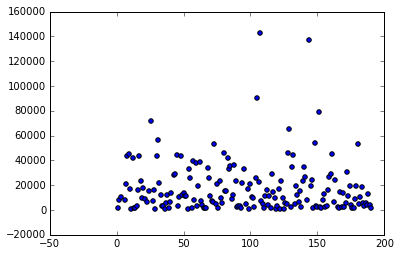

In [91]:
plt.scatter(gdp_data.index, gdp_data['2013'])

#### Richest Countries

In [97]:
gdp_data[gdp_data["2013"] > 50000].sort()

,2013,Country name
26,71776.648012,BRUNEI DARUSSALAM
31,56564.935947,SWITZERLAND
73,53215.937373,HONG KONG
105,90410.143652,LUXEMBURG
107,142599.240319,MACAU
129,65461.165387,NORWAY
144,136727.253610,QATAR
148,53644.126925,SAUDI ARABIA
151,78763.384944,SINGAPORE
180,53041.981406,UNITED STATES


#### Poorest Countries

In [100]:
gdp_data[gdp_data["2013"] < 1500].sort()

,2013,Country name
11,771.715430,BURUNDI
29,603.742960,CENTRAL AFRICAN REPUBLIC
36,809.217533,"CONGO, THE DRC"
39,1446.171495,COMOROS
53,1195.676757,ERITREA
56,1380.000264,ETHIOPIA
65,1253.084900,GUINEA
67,1407.026772,GUINEA-BISSAU
99,877.995480,LIBERIA
110,1413.990757,MADAGASCAR
